# **BERLIN AIRBNB**

https://www.kaggle.com/datasets/lennarthaupts/airbnb-berlin-july-2021?resource=download

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('listings_berlin.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19095 entries, 0 to 19094
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19095 non-null  int64  
 1   name                            19065 non-null  object 
 2   host_id                         19095 non-null  int64  
 3   host_name                       19083 non-null  object 
 4   neighbourhood_group             19095 non-null  object 
 5   neighbourhood                   19095 non-null  object 
 6   latitude                        19095 non-null  float64
 7   longitude                       19095 non-null  float64
 8   room_type                       19095 non-null  object 
 9   price                           19095 non-null  int64  
 10  minimum_nights                  19095 non-null  int64  
 11  number_of_reviews               19095 non-null  int64  
 12  last_review                     

In [ ]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1944,bright & airy Pberg/Mitte 3 months or more,2164,Lulah,Mitte,Brunnenstr. Nord,52.54433,13.39761,Private room,28,60,18,2018-11-11,0.21,3,101
1,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53305,13.40394,Entire home/apt,74,90,141,2020-04-03,2.20,6,357
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,90,62,147,2017-03-20,1.14,1,254
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49884,13.34940,Private room,29,7,27,2018-08-16,0.28,1,285
4,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51163,13.45289,Entire home/apt,79,7,135,2021-01-02,1.02,1,0


In [ ]:
porcentajes = (data.isnull().sum()/len(data))*100
porcentajes

id                                 0.000000
name                               0.157109
host_id                            0.000000
host_name                          0.062844
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       21.759623
reviews_per_month                 21.759623
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

# **DATA CLEANING**

Vamos a ver que atributos nos pueden ser de utilidad

## **id, name, host_id y host_name**

In [ ]:
# En principio parece que podemos prescindir de id, name, host_id y host_name
data = data.drop(['id', 'name', 'host_id', 'host_name'], axis=1)

## **zona**

Vamos a crear una nueva variable, zona, que puede ser Berlín este o Berlín oeste, o Friedrichshain-Kreuzberg, que comprende tanto Berlín este como Berlín oeste, que usaremos con posterioridad para clasificación

In [ ]:
# Vamos a crear una nueva variable

east = ['Treptow - Köpenick', 'Marzahn - Hellersdorf', 'Lichtenberg', 'Pankow', 'Mitte']

data['zona'] = 'west'
for e in east:
    data['zona'][data['neighbourhood_group'] == e] = 'east'
# Hay zonas de Friedrichshain-Kreuzberg que pueden pertenecer tanto a Berlín este como a Berlín oeste
data['zona'][data['neighbourhood_group'] == 'Friedrichshain-Kreuzberg'] = 'Friedrichshain-Kreuzberg'

<ipython-input-191-64123fd604e1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['zona'][data['neighbourhood_group'] == e] = 'east'
<ipython-input-191-64123fd604e1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['zona'][data['neighbourhood_group'] == 'Friedrichshain-Kreuzberg'] = 'Friedrichshain-Kreuzberg'


In [ ]:
data['zona'].value_counts()

east                        8528
west                        6370
Friedrichshain-Kreuzberg    4197
Name: zona, dtype: int64

In [ ]:
data['zona']=data['zona'].astype('category').cat.codes

## **neighbourhood_group y neighbourhood**

neighbourhood_group hace referencia a 12 diferentes distritos que a su vez contienen barrios (neighbourhood)

In [ ]:
data['neighbourhood_group'].value_counts()

Friedrichshain-Kreuzberg    4197
Mitte                       4173
Pankow                      2981
Neukölln                    2608
Charlottenburg-Wilm.        1567
Tempelhof - Schöneberg      1371
Treptow - Köpenick           620
Lichtenberg                  612
Steglitz - Zehlendorf        415
Reinickendorf                271
Marzahn - Hellersdorf        142
Spandau                      138
Name: neighbourhood_group, dtype: int64

In [ ]:
# Para simplificar nos quedamos con neighbourhood_group
data['neighbourhood_group']=data['neighbourhood_group'].astype('category').cat.codes
data = data.drop(['neighbourhood'], axis=1)

## **latitude y longitude**

In [ ]:
# Parece lógico que el precio dependa de la distancia al centro de Berlín

# Coordenadas del centro de Berlín
berlin = (52.52437, 13.41053)

import geopy.distance
data['to_centre'] = np.nan
for i in data.index:
    data['to_centre'][i] = geopy.distance.distance(berlin, (data['latitude'][i], data['longitude'][i])).km

<ipython-input-196-15df7a428d15>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['to_centre'][i] = geopy.distance.distance(berlin, (data['latitude'][i], data['longitude'][i])).km


In [ ]:
data = data.drop(['latitude', 'longitude'], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19095 entries, 0 to 19094
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             19095 non-null  int8   
 1   room_type                       19095 non-null  object 
 2   price                           19095 non-null  int64  
 3   minimum_nights                  19095 non-null  int64  
 4   number_of_reviews               19095 non-null  int64  
 5   last_review                     14940 non-null  object 
 6   reviews_per_month               14940 non-null  float64
 7   calculated_host_listings_count  19095 non-null  int64  
 8   availability_365                19095 non-null  int64  
 9   zona                            19095 non-null  int8   
 10  to_centre                       19095 non-null  float64
dtypes: float64(2), int64(5), int8(2), object(2)
memory usage: 1.3+ MB


## **room_type**

In [ ]:
data['room_type'].value_counts()

Entire home/apt    10636
Private room        8042
Shared room          249
Hotel room           168
Name: room_type, dtype: int64

In [ ]:
data['room_type']=data['room_type'].astype('category').cat.codes

## **number_of_reviews, last_review y reviews_per_month**

In [ ]:
porcentajes = (data.isnull().sum()/len(data))*100
porcentajes

neighbourhood_group                0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       21.759623
reviews_per_month                 21.759623
calculated_host_listings_count     0.000000
availability_365                   0.000000
zona                               0.000000
to_centre                          0.000000
dtype: float64

In [ ]:
# Cuando last_review y reviews_per_month están a nulos es porque todavía no ha tenido ninguna visualización
data = data.dropna()

In [ ]:
# De la fecha de la última visualización nos quedamos con el año
data['last_review'] = data['last_review'].str.slice(stop=4).astype('float64')

<ipython-input-203-3458f3d63a17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_review'] = data['last_review'].str.slice(stop=4).astype('float64')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14940 entries, 0 to 19033
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             14940 non-null  int8   
 1   room_type                       14940 non-null  int8   
 2   price                           14940 non-null  int64  
 3   minimum_nights                  14940 non-null  int64  
 4   number_of_reviews               14940 non-null  int64  
 5   last_review                     14940 non-null  float64
 6   reviews_per_month               14940 non-null  float64
 7   calculated_host_listings_count  14940 non-null  int64  
 8   availability_365                14940 non-null  int64  
 9   zona                            14940 non-null  int8   
 10  to_centre                       14940 non-null  float64
dtypes: float64(3), int64(5), int8(3)
memory usage: 1.1 MB


## **Variable objetivo: price**

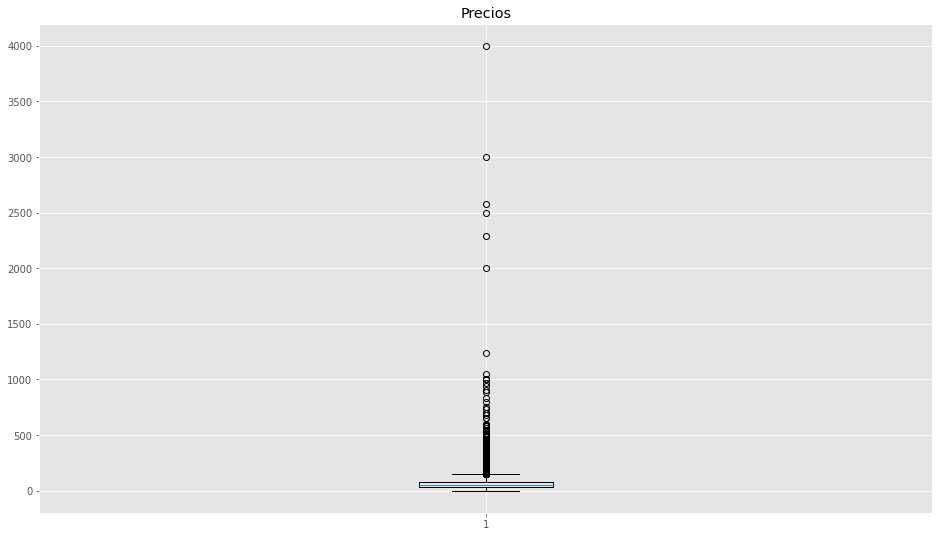

In [ ]:
plt.boxplot(data['price'])
plt.title("Precios")
plt.show()

In [ ]:
# Vemos que hay muchos outliers
# 99% de los precios está por debajo de 300 euros, aproximadamente
data['price'].quantile(0.99)

299.0

In [ ]:
# Vamos a eliminar aquellos registros con precio igual a 0 o superior a 300 para que no nos distorsione los resultados
data = data[data['price']<=300]
data = data[data['price']>0]

In [ ]:
data.describe()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,zona,to_centre
count,14806.000000,14806.000000,14806.000000,14806.000000,14806.000000,14806.000000,14806.000000,14806.000000,14806.000000,14806.000000,14806.000000
mean,4.219776,0.893151,65.184250,8.030461,27.637377,2018.694178,0.717860,2.668445,86.240916,1.108199,4.754775
std,2.982657,1.009210,44.968027,32.285343,53.550624,1.632109,1.449207,6.342085,123.300350,0.737506,3.177936
min,0.000000,0.000000,8.000000,1.000000,1.000000,2012.000000,0.010000,1.000000,0.000000,0.000000,0.027850
25%,1.000000,0.000000,35.000000,2.000000,2.000000,2018.000000,0.090000,1.000000,0.000000,1.000000,2.788865
50%,4.000000,0.000000,50.000000,3.000000,7.000000,2019.000000,0.270000,1.000000,0.000000,1.000000,4.157607
75%,6.000000,2.000000,80.000000,5.000000,25.000000,2020.000000,0.830000,2.000000,163.000000,2.000000,5.826992
max,11.000000,3.000000,300.000000,1124.000000,620.000000,2021.000000,94.350000,76.000000,365.000000,2.000000,26.163171


# **REDUCCIÓN DIMENSIONALIDAD**

## **CORRELACIÓN**

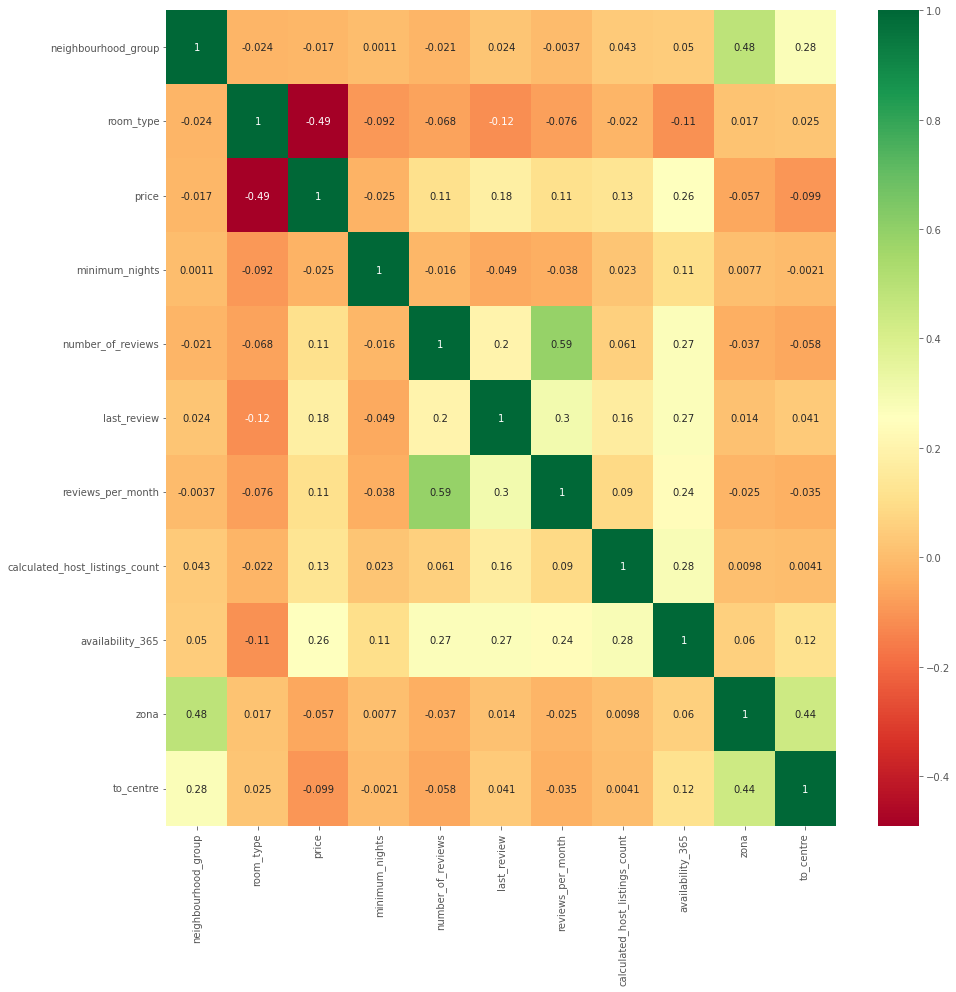

In [ ]:
plt.figure(figsize=(15,15))
g=sns.heatmap(data.corr(), annot=True, cmap="RdYlGn") 

In [ ]:
# Como reviews_per_month y number_of_reviews están correlacionadas nos quedamos con una de ellas
data = data.drop(['reviews_per_month'], axis=1)

## **PCA**

In [ ]:
X = data[['neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews', 'last_review', 'calculated_host_listings_count', 'availability_365', 'to_centre']]
y = data['price']

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8) 
pca.fit(X_scaled) 
X_pca = pca.transform(X_scaled) 

print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))

shape of X_pca (14806, 8)
[0.21248674 0.16106767 0.13485336 0.12201617 0.11108253 0.09669104
 0.08945842 0.07234408]
suma: 0.7415064685372427


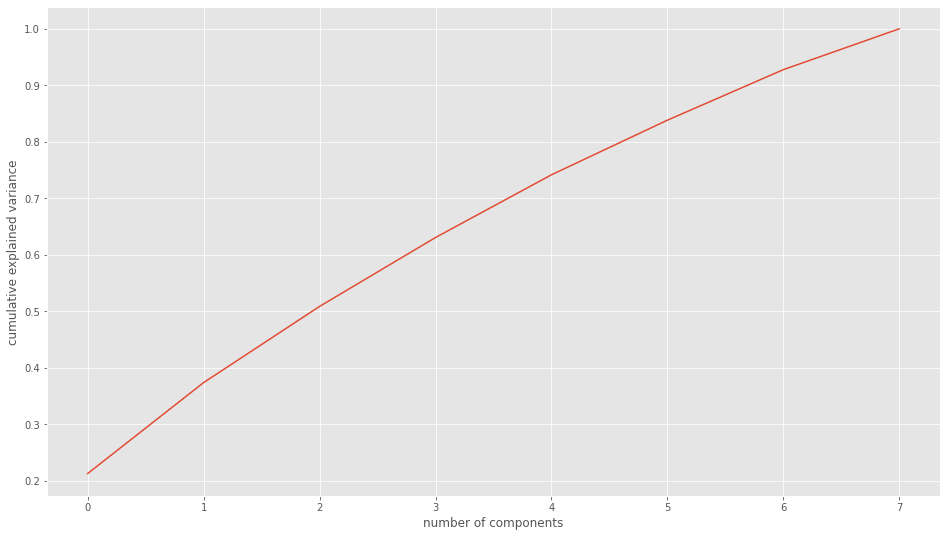

In [ ]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# **SUPERVISADO (REGRESIÓN)**
El objetivo es predecir el precio

## **REGRESIÓN LINEAL MÚLTIPLE**

### **Con 8 componentes**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

X = data[['neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews', 'last_review', 'calculated_host_listings_count', 'availability_365', 'to_centre']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print('Coeficientes : \n', regr.coef_) 

print('Error medio cuadrático: %.2f'
      % mean_squared_error(y_test, y_pred))

# Coeficiente de determinación -> va entre 0 y 1, nos indica cuanto podemos explicar con nuestro algoritmo
# Puede considerarse aceptable a partir de un 0.65, sin embargo 0.7 - 0.8 son valores deseables.
print('Coeficiente de determinación: %.2f'
      % r2_score(y_test, y_pred))

Coeficientes : 
 [-1.40827724e-01 -2.07886405e+01 -1.43629027e-01 -2.97646216e-03
  1.79199063e+00  4.59655237e-01  7.11611027e-02 -1.57026623e+00]
Error medio cuadrático: 1371.08
Coeficiente de determinación: 0.31


### **Con reducción de componentes con PCA**

In [ ]:
# Pregunta 4 del examen

## **SVR (Support Vector Regresion)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

X = data.loc[:, ['neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews', 'last_review', 'calculated_host_listings_count', 'availability_365', 'to_centre']]
y = data.loc[:, 'price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

clf = SVR(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([58.70433942, 58.46703935, 49.81906928, ..., 58.55700773,
       49.42180703, 48.81795228])

## **DECISION TREE**


In [ ]:
X = data[['neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews', 'last_review', 'calculated_host_listings_count', 'availability_365', 'to_centre']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeRegressor(random_state=0)
clf = clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([130.,  65.,  45., ...,  23.,  45.,  32.])

# **SUPERVISADO (CLASIFICACIÓN)**
El objetivo es clasificar las ofertas en dos zonas (este y oeste de Berlín), más otra que está entre este y oeste.

## **SVC**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14806 entries, 0 to 19033
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             14806 non-null  int8   
 1   room_type                       14806 non-null  int8   
 2   price                           14806 non-null  int64  
 3   minimum_nights                  14806 non-null  int64  
 4   number_of_reviews               14806 non-null  int64  
 5   last_review                     14806 non-null  float64
 6   calculated_host_listings_count  14806 non-null  int64  
 7   availability_365                14806 non-null  int64  
 8   zona                            14806 non-null  int8   
 9   to_centre                       14806 non-null  float64
dtypes: float64(2), int64(5), int8(3)
memory usage: 968.8 KB


In [ ]:
X = data.loc[:, ['neighbourhood_group', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'calculated_host_listings_count', 'availability_365', 'to_centre']]
y = data.loc[:, 'zona']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.svm import SVC

classifier =  SVC(kernel="linear", C=0.025)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred


array([2, 0, 1, ..., 0, 1, 1], dtype=int8)

In [ ]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       650
           1       0.87      0.78      0.82      1334
           2       0.73      0.83      0.78       978

    accuracy                           0.84      2962
   macro avg       0.86      0.87      0.86      2962
weighted avg       0.85      0.84      0.84      2962



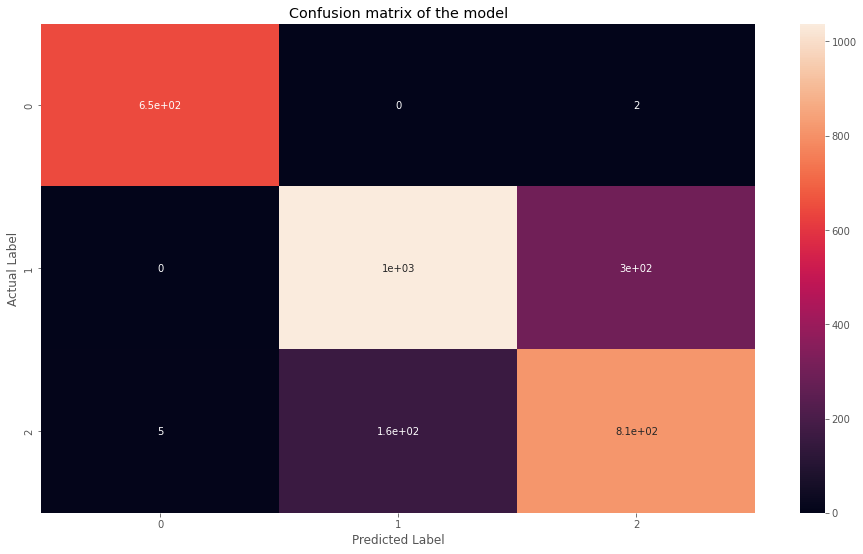

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True)
plt.xlabel("Predicted Label")
plt.ylabel('Actual Label')
plt.title('Confusion matrix of the model')
plt.show()

## **DECISION TREE**

In [ ]:
# Pregunta 7 del examen